In [1]:
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [2]:
!pip install torchsummary

In [3]:
from pathlib import Path
import numpy as np
import os, shutil
import matplotlib.pyplot as plt

from PIL import Image

from tqdm.auto import tqdm

import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torchsummary import summary
from torch.utils.data.dataset import Subset
from torch import nn

In [4]:
import urllib.request
import tarfile
import os

url = "https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938130-1629953152/screw.tar.xz"
filename = "screw.tar.xz"

# Download the file
local_filename, headers = urllib.request.urlretrieve(url, filename)

# Check if the file exists before extracting
if os.path.exists(local_filename):
    with tarfile.open(local_filename) as f:
        f.extractall('.')
    print("Extraction complete.")
else:
    print(f"Download failed: {local_filename} does not exist.")


Extraction complete.


In [5]:
import matplotlib.pyplot as plt
from PIL import Image # here you can use cv2.imread/ skimage instead of PIL.Image.open
# image_path = 'carpet/test/000.png'
image_path = 'screw/test/manipulated_front/000.png'
image = Image.open(image_path)
print(image.size)

(1024, 1024)


Transformed image tensor shape: torch.Size([3, 224, 224])


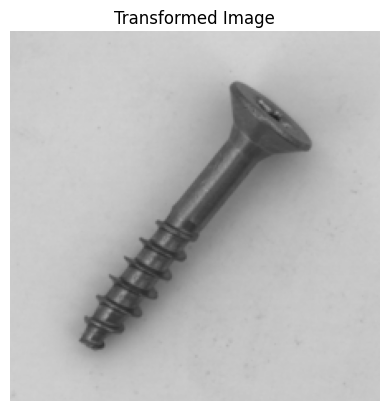

In [6]:
from torchvision.transforms import transforms
from PIL import Image
import torch
import matplotlib.pyplot as plt

# ---------------------------
# Define the transformation pipeline
# ---------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor()           # Convert to tensor
])

# ---------------------------
# Load or define your image
# ---------------------------
# Example: Load a sample image from file (update path accordingly)
image_path = "/content/screw/test/manipulated_front/000.png"
image = Image.open(image_path).convert("RGB")  # Ensure RGB format

# ---------------------------
# Apply the transformation
# ---------------------------
if not isinstance(image, torch.Tensor):
    image_tensor = transform(image)
else:
    image_tensor = image  # If it's already a tensor, use it directly

# ---------------------------
# Print shape and plot
# ---------------------------
print("Transformed image tensor shape:", image_tensor.shape)

# Permute dimensions to match (H, W, C) for matplotlib
plt.imshow(image_tensor.permute(1, 2, 0))
plt.title("Transformed Image")
plt.axis("off")
plt.show()


Memory usage of one tensor: 588.00 KB
Estimated memory for 279 tensors: 164052.00 KB


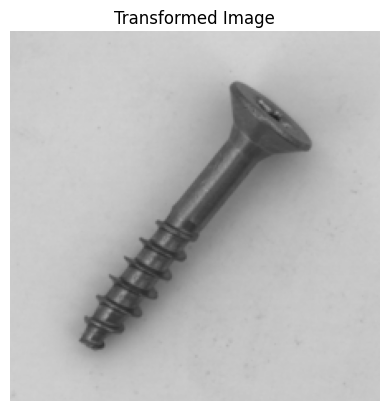

In [8]:
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Load image from file path (use a real image path from your test or train folder)
image_path = '/content/screw/test/manipulated_front/000.png'
image = Image.open(image_path).convert('RGB')

# Transform PIL image to tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
image_tensor = transform(image)

# ✅ Now calculate memory usage on the tensor
memory_usage = image_tensor.numel() * image_tensor.element_size()  # bytes per image

# For 279 images
total_memory_kb = (memory_usage * 279) / 1024

# Print memory usage
print(f"Memory usage of one tensor: {memory_usage / 1024:.2f} KB")
print(f"Estimated memory for 279 tensors: {total_memory_kb:.2f} KB")

# Plot the transformed image
plt.imshow(image_tensor.permute(1, 2, 0))
plt.title("Transformed Image")
plt.axis("off")
plt.show()


In [9]:
from torchvision.datasets import ImageFolder

# Define the path to the directory containing the train images
# train_image_path = 'carpet/train'
train_image_path = 'screw/train'

# Load the train dataset using the ImageFolder dataset class
# ImageFolder is a PyTorch dataset class for loading images from a directory
# It automatically loads images from subdirectories and applies transformations to them
# In this case, 'transform' is a transformation applied to each image in the dataset
# It preprocesses the images before they are used for training
good_dataset = ImageFolder(root=train_image_path, transform=transform)

# Access a sample from the dataset
# In this case, we're accessing the first sample
# x contains the preprocessed image data
# y contains the corresponding label (class index)
x, y = good_dataset[0]

# Print the shape of the preprocessed image data (x) and its corresponding label (y)
print("Image Shape:", x.shape)
print("Label:", y)


Image Shape: torch.Size([3, 224, 224])
Label: 0


In [10]:
import torch

# Split the dataset into training and testing subsets
# The `torch.utils.data.random_split` function randomly splits a dataset into non-overlapping subsets
# The first argument `good_dataset` is the dataset to be split
# The second argument `[0.8, 0.2]` specifies the sizes of the subsets. Here, 80% for training and 20% for testing.
train_dataset, test_dataset = torch.utils.data.random_split(good_dataset, [0.8, 0.2])

# Print the lengths of the original dataset, training subset, and testing subset
print("Total number of samples in the original dataset:", len(good_dataset))
print("Number of samples in the training subset:", len(train_dataset))
print("Number of samples in the testing subset:", len(test_dataset))

Total number of samples in the original dataset: 320
Number of samples in the training subset: 256
Number of samples in the testing subset: 64


In [ ]:
# train test split for the autoencoder

In [11]:
import torch
from torch.utils.data import DataLoader

# Assuming train_dataset and test_dataset are PyTorch datasets containing image data and labels

# Set the batch size
BS = 16

# Create data loaders for training and testing datasets
train_loader = DataLoader(train_dataset, batch_size=BS, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BS, shuffle=True)

# Get a batch of images and labels from the training loader
image_batch, label_batch = next(iter(train_loader))

# Print the shape of the input images and labels
print(f'Shape of input images: {image_batch.shape}')
print(f'Shape of labels: {label_batch.shape}')
# Calculate the memory usage
memory_usage = image_batch.numel() * image_batch.element_size()

# Print the memory usage
print(f"Memory usage of the tensor: {memory_usage//1024} KB")

Shape of input images: torch.Size([16, 3, 224, 224])
Shape of labels: torch.Size([16])
Memory usage of the tensor: 9408 KB


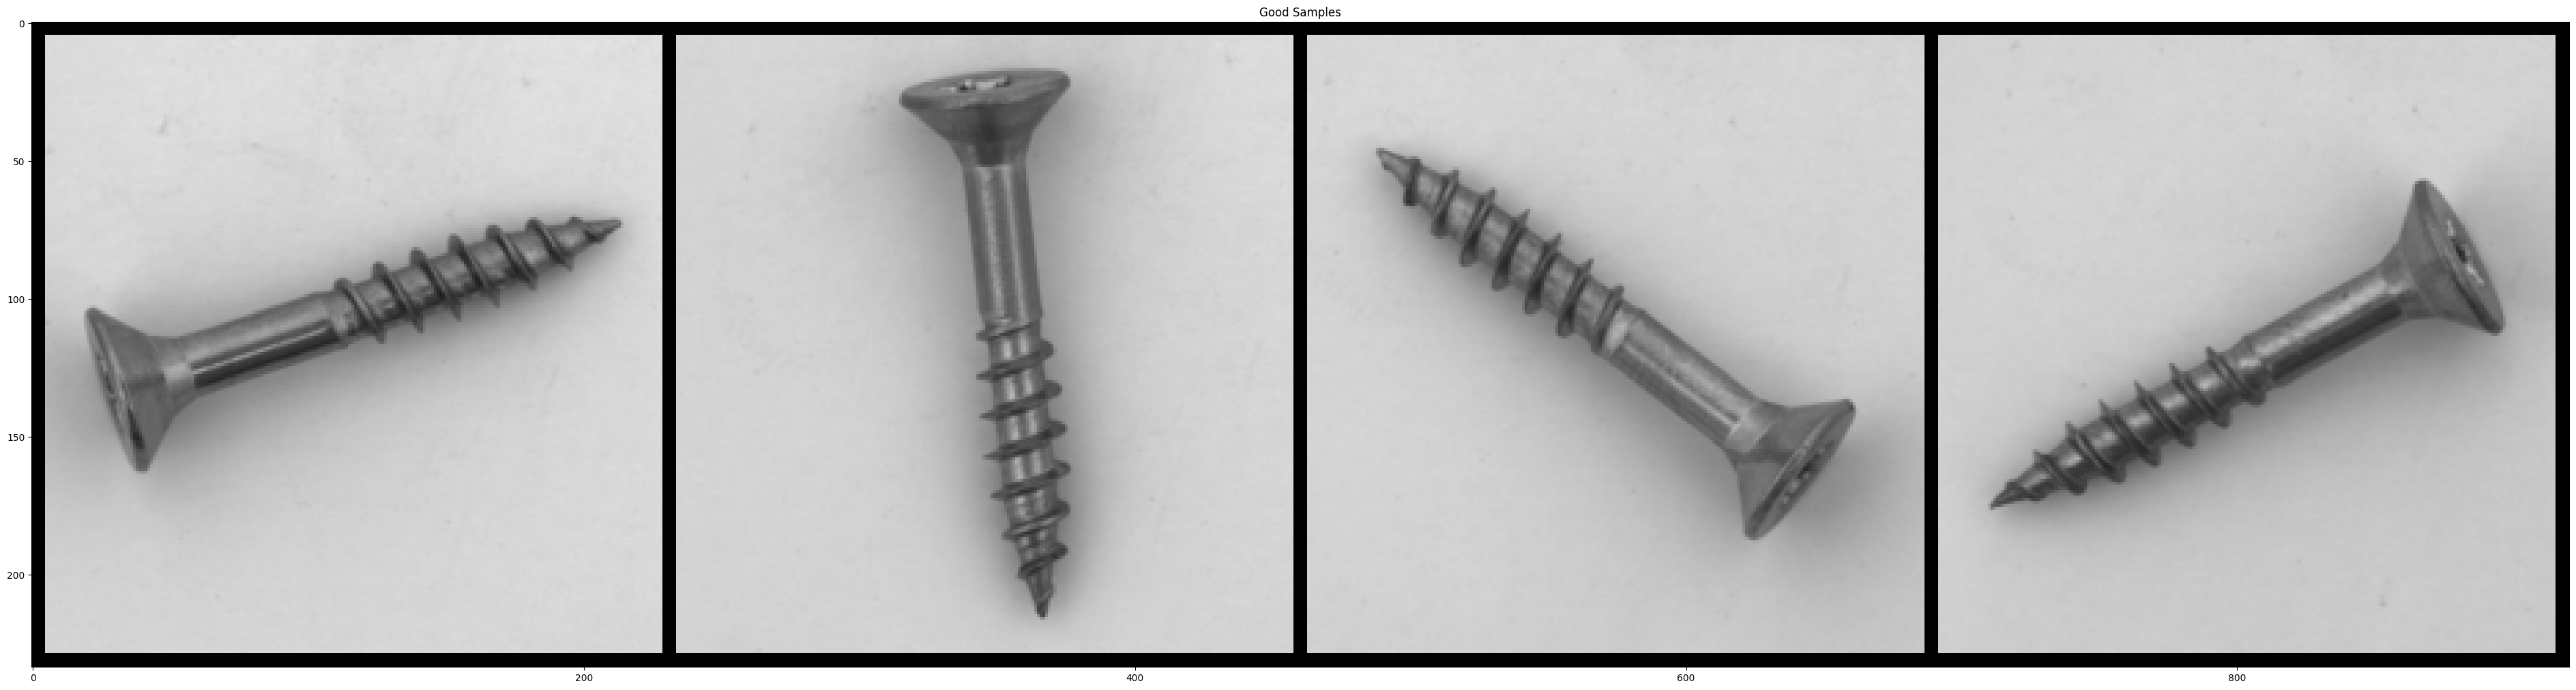

In [12]:
# Set the figure size
plt.figure(figsize=(12*4, 48*4))

# Create a grid of images from the image batch and visualize it
grid = torchvision.utils.make_grid(image_batch[0:4], padding=5, nrow=4)
plt.imshow(grid.permute(1, 2, 0))  # Permute dimensions to (height, width, channels) for visualization
plt.title('Good Samples')  # Set the title of the plot
plt.show()  # Show the plot

In [ ]:
"""# Autoencoder Example
This code demonstrates a simple autoencoder architecture using PyTorch. It includes an encoder that compresses the input image and a decoder that reconstructs the image from the compressed representation.
"""
"""this code demonstrates a simple autoencoder architecture using PyTorch. It includes an encoder that compresses the input image and a decoder that reconstructs the image from the compressed representation.     
"""
import torch.nn.functional as F
from torch import nn
from PIL import Image
from torchvision import transforms

# Preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

input_image = Image.open(r'screw/train/good/000.png').convert("RGB")
input_image = transform(input_image)
input_image = input_image.unsqueeze(0)  # shape: [1, 3, 224, 224]

print("Input shape:", input_image.shape)

# Encoder
c1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=4, padding=1)
x = c1(input_image)
print("After c1:", x.shape)

ap1 = nn.AvgPool2d(kernel_size=2, stride=2)
x = ap1(x)
print("After ap1:", x.shape)

c2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4, padding=1)
x = c2(x)
x = ap1(x)
print("After c2 + ap2:", x.shape)

c3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
x = c3(x)
x = ap1(x)
print("After c3 + ap3:", x.shape)

# Decoder
c4 = nn.ConvTranspose2d(in_channels=256, out_channels=256, kernel_size=4, stride=2, padding=1)
x = c4(x)
print("After c4:", x.shape)

c5 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=4, stride=2, padding=1)
x = c5(x)
print("After c5:", x.shape)

c6 = nn.ConvTranspose2d(in_channels=128, out_channels=3, kernel_size=4, stride=2, padding=1)
x = c6(x)
print("After c6:", x.shape)


Input shape: torch.Size([1, 3, 224, 224])
After c1: torch.Size([1, 128, 223, 223])
After ap1: torch.Size([1, 128, 111, 111])
After c2 + ap2: torch.Size([1, 256, 55, 55])
After c3 + ap3: torch.Size([1, 256, 27, 27])
After c4: torch.Size([1, 256, 54, 54])
After c5: torch.Size([1, 128, 108, 108])
After c6: torch.Size([1, 3, 216, 216])


In [ ]:
import torch
import torch.nn as nn  #nn will contain all the neural network cnn etc

"""Autoencoder architecture for image reconstruction.
This autoencoder consists of an encoder that compresses the input image into a lower-dimensional representation, 
and a decoder that reconstructs the image from this representation.
The encoder uses convolutional layers with ReLU activations and average pooling, while the decoder uses
transposed convolutional layers with ReLU activations and a final Sigmoid activation to output an image in the range [0, 1].

The architecture is designed to handle RGB images of size 224x224.

The autoencoder is defined as a subclass of nn.Module, with an encoder and decoder defined as sequential layers.
The encoder compresses the input image through a series of convolutional layers, reducing its spatial dimensions while increasing the depth.
The decoder then reconstructs the image by upsampling through transposed convolutional layers, ultimately producing an output image of the same size as the input.
"""


"""declaring the autoencoder class which inherits from nn.Module"""
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=4),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=4),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 256, kernel_size=3),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 256, kernel_size=4, stride=2, output_padding=1 ),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=5, stride=2, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 3, kernel_size=5, stride=2, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Test the autoencoder architecture
model = Autoencoder()
input_image = torch.randn(1, 3, 224, 224)  # Sample input image
output_image = model(input_image)
print(output_image.shape)  # Print the shape of the output image


torch.Size([1, 3, 224, 224])


In [17]:
ckpoints = torch.load('simple_autoencoder_l2_loss.pth')
model.load_state_dict(ckpoints)

<All keys matched successfully>

In [16]:
torch.save(model.state_dict(), 'simple_autoencoder_l2_loss.pth')


In [18]:
ckpoints = torch.load('simple_autoencoder_l2_loss.pth')
model.load_state_dict(ckpoints)

<All keys matched successfully>

In [19]:
# Define the loss function and optimizer

model.cuda()# Move the model to the GPU
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch [1/300], Loss: 0.0120, Validation Loss: 0.0130
Epoch [6/300], Loss: 0.0039, Validation Loss: 0.0036
Epoch [11/300], Loss: 0.0028, Validation Loss: 0.0027
Epoch [16/300], Loss: 0.0020, Validation Loss: 0.0019
Epoch [21/300], Loss: 0.0014, Validation Loss: 0.0013
Epoch [26/300], Loss: 0.0011, Validation Loss: 0.0011
Epoch [31/300], Loss: 0.0010, Validation Loss: 0.0010
Epoch [36/300], Loss: 0.0010, Validation Loss: 0.0011
Epoch [41/300], Loss: 0.0010, Validation Loss: 0.0009
Epoch [46/300], Loss: 0.0009, Validation Loss: 0.0009
Epoch [51/300], Loss: 0.0009, Validation Loss: 0.0009
Epoch [56/300], Loss: 0.0009, Validation Loss: 0.0009
Epoch [61/300], Loss: 0.0012, Validation Loss: 0.0010
Epoch [66/300], Loss: 0.0009, Validation Loss: 0.0009
Epoch [71/300], Loss: 0.0008, Validation Loss: 0.0008
Epoch [76/300], Loss: 0.0007, Validation Loss: 0.0007
Epoch [81/300], Loss: 0.0008, Validation Loss: 0.0007
Epoch [86/300], Loss: 0.0007, Validation Loss: 0.0007
Epoch [91/300], Loss: 0.0008, 

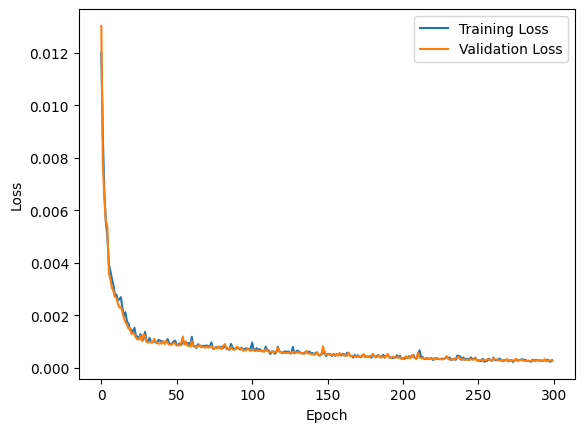

In [ ]:
# Define a list to store training loss and validation loss
Loss = []
Validation_Loss = []

"""Train the model for a specified number of epochs
This loop iterates through the training dataset for a given number of epochs, computes the loss,    
and updates the model parameters using backpropagation. It also calculates validation loss after each epoch to monitor the model's performance on unseen data.

The training process involves setting the model to training mode, iterating through the training data, computing the loss, and updating the model parameters using backpropagation.
After each epoch, the model is evaluated on the validation dataset to compute the average validation loss.
The training process involves setting the model to training mode, iterating through the training data, computing the loss, and updating the model parameters using backpropagation.

The training process involves setting the model to training mode, iterating through the training data, computing the loss, and updating the model parameters using backpropagation."""

num_epochs = 300
for epoch in tqdm(range(num_epochs)):
    model.train()  # Set model to training mode
    for img, _ in train_loader:
        img = img.cuda()

        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad() #clears the gradients of all optimized tensors.  This step is necessary because gradients are accumulated by default in PyTorch, and we want to compute fresh gradients for the current batch of data.
        loss.backward() # This line computes the gradients of the loss function with respect to the model parameters. These gradients are used to update the model parameters during optimization.
        optimizer.step() # This line updates the model parameters using the computed gradients.
    Loss.append(loss.item())


    # Calculate validation loss
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        val_loss_sum = 0.0
        num_batches = 0
        for img, _ in test_loader:
            img = img.cuda()
            output = model(img)
            val_loss = criterion(output, img)
            val_loss_sum += val_loss.item()
            num_batches += 1
        val_loss_avg = val_loss_sum / num_batches
        Validation_Loss.append(val_loss_avg)

    if epoch % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item(), val_loss_avg))

plt.plot(Loss, label='Training Loss')
plt.plot(Validation_Loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Save the model
# torch.save(model.state_dict(), 'simple_autoencoder_l2_loss.pth')
# model.eval()

# ckpoints = torch.load('simple_autoencoder_l2_loss.pth')
# model.load_state_dict(ckpoints)

torch.Size([16, 224, 224])


<Figure size 1600x1200 with 0 Axes>

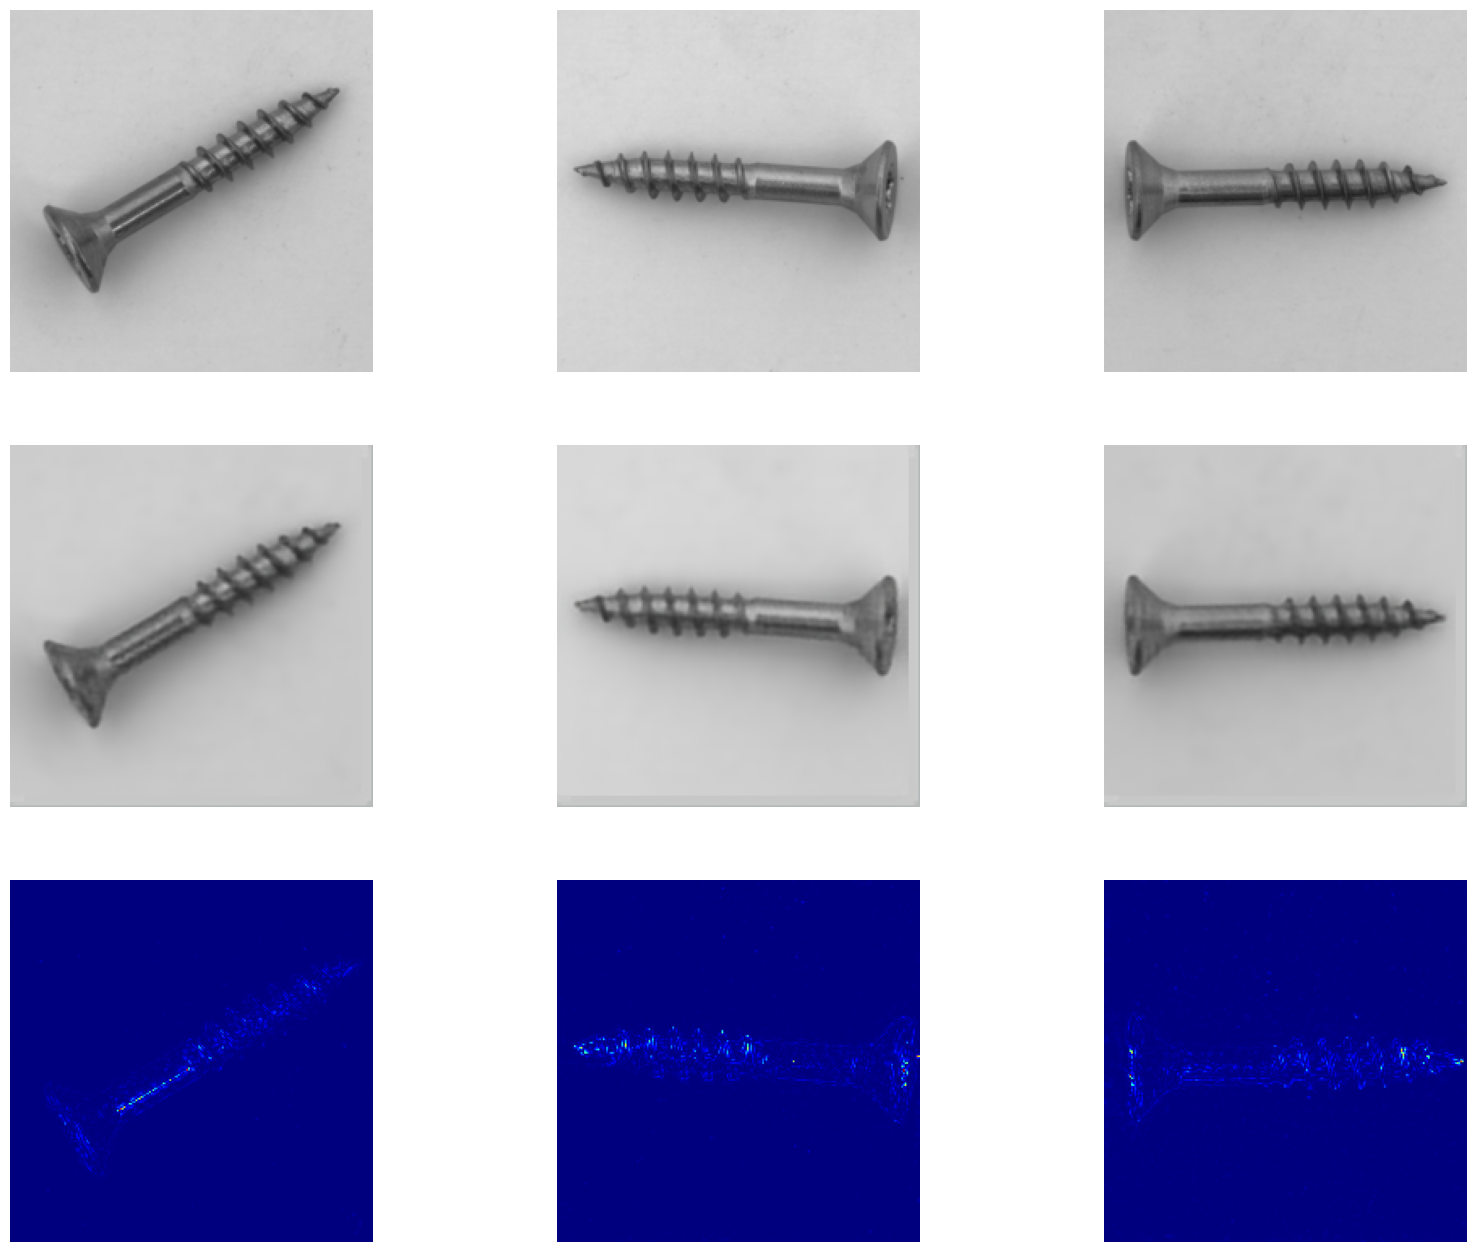

In [21]:
with torch.no_grad():
    for data, _ in train_loader:
        data = data.cuda()
        recon = model(data)
        break

recon_error =  ((data-recon)**2).mean(axis=1)
print(recon_error.shape)

plt.figure(dpi=250)
fig, ax = plt.subplots(3, 3, figsize=(5*4, 4*4))
for i in range(3):
    ax[0, i].imshow(data[i].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].imshow(recon[i].cpu().numpy().transpose((1, 2, 0)))
    ax[2, i].imshow(recon_error[i][0:-10,0:-10].cpu().numpy(), cmap='jet',vmax= torch.max(recon_error[i])) #[0:-10,0:-10]
    ax[0, i].axis('OFF')
    ax[1, i].axis('OFF')
    ax[2, i].axis('OFF')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1600x1200 with 0 Axes>

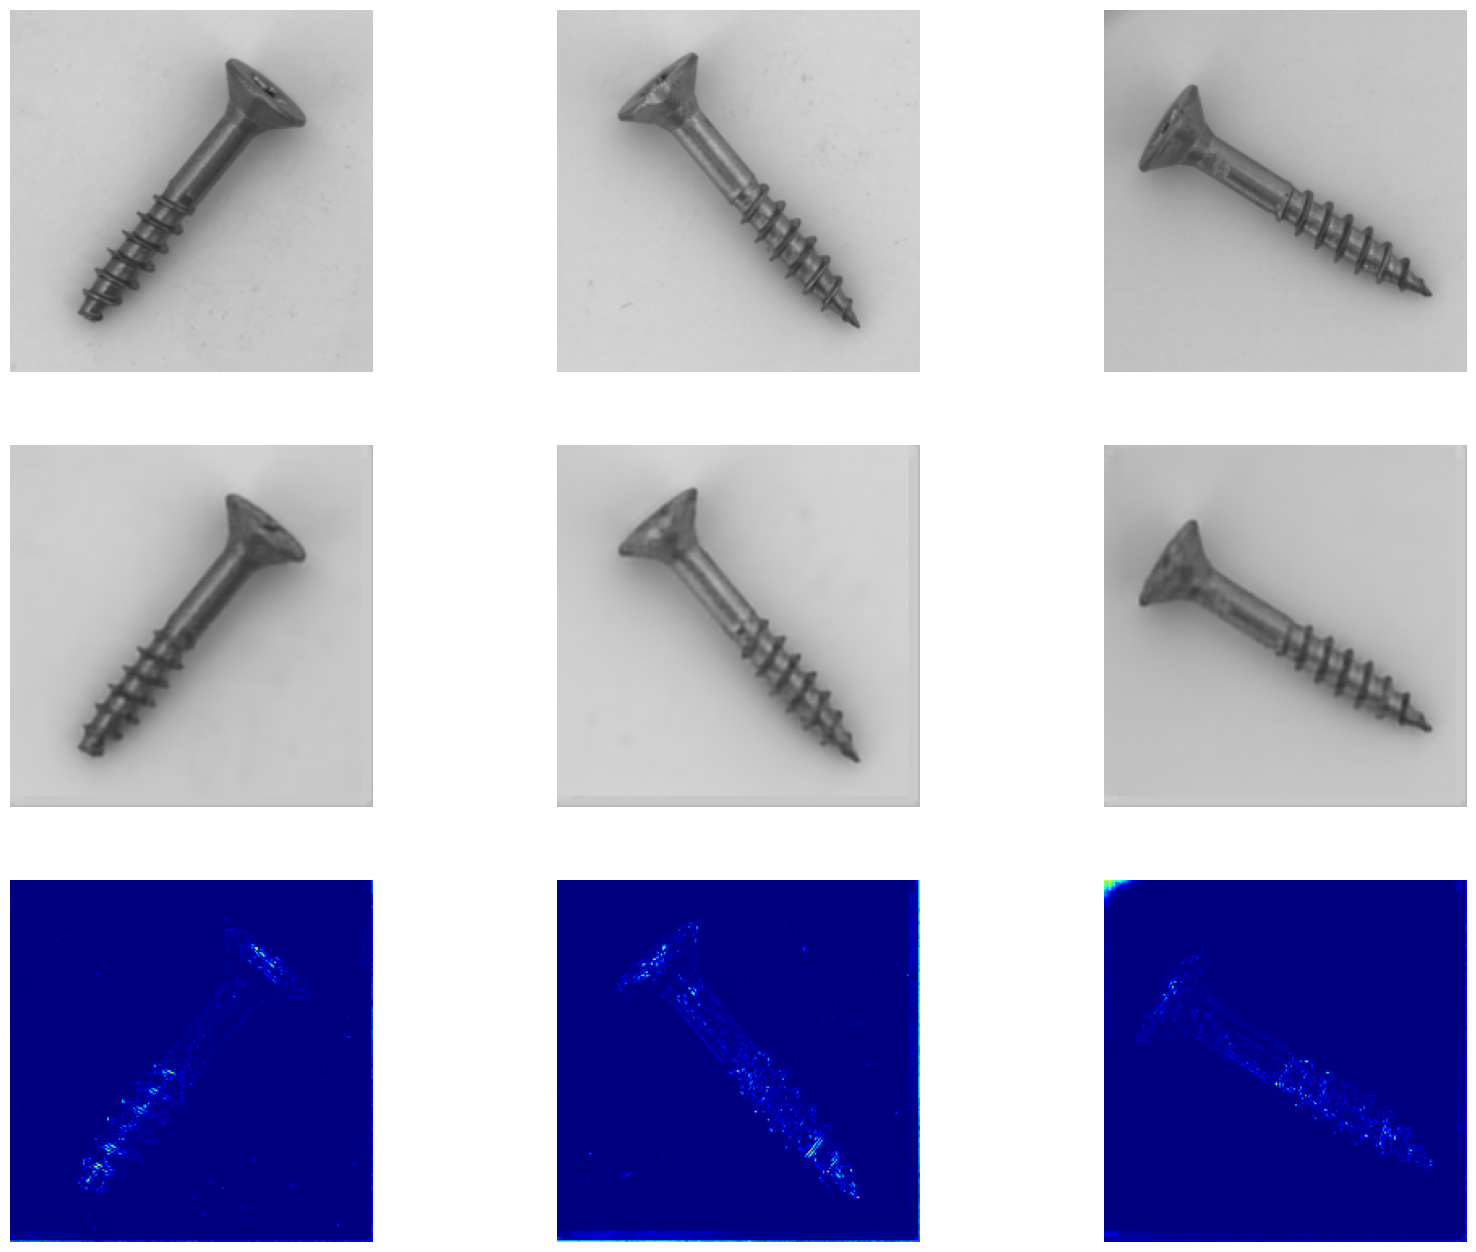

In [23]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# Define transform (example: resize and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load test images as RGB
test_image_1 = transform(Image.open('/content/screw/test/manipulated_front/000.png').convert('RGB'))
test_image_2 = transform(Image.open('/content/screw/test/scratch_head/000.png').convert('RGB'))
test_image_3 = transform(Image.open('/content/screw/test/scratch_neck/000.png').convert('RGB'))

# Stack into a batch
data = torch.stack([test_image_1, test_image_2, test_image_3])

# Move to GPU and run model
with torch.no_grad():
    data = data.cuda()
    recon = model(data)

# Compute reconstruction error
recon_error = ((data - recon) ** 2).mean(axis=1)

# Plot original, reconstructed, and error
plt.figure(dpi=250)
fig, ax = plt.subplots(3, 3, figsize=(5 * 4, 4 * 4))
for i in range(3):
    ax[0, i].imshow(data[i].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].imshow(recon[i].cpu().numpy().transpose((1, 2, 0)))
    ax[2, i].imshow(recon_error[i].cpu().numpy(), cmap='jet', vmax=torch.max(recon_error[i]))
    ax[0, i].axis('OFF')
    ax[1, i].axis('OFF')
    ax[2, i].axis('OFF')
plt.show()


Obtain the fault detection accuracy

In [24]:
RECON_ERROR=[]
with torch.no_grad():
    for data, _ in train_loader:
        data = data.cuda()
        recon = model(data)
        data_recon_squared_mean =  ((data-recon)**2).mean(axis=(1))[:,0:-10,0:-10].mean(axis=(1,2))

        RECON_ERROR.append(data_recon_squared_mean)

RECON_ERROR = torch.cat(RECON_ERROR).cpu().numpy()

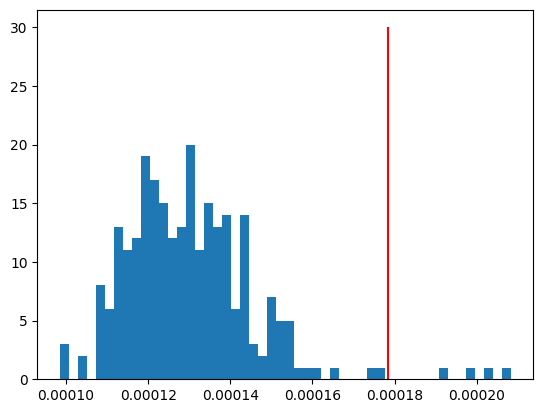

In [25]:
best_threshold = np.mean(RECON_ERROR) + 3 * np.std(RECON_ERROR)

plt.hist(RECON_ERROR,bins=50)
plt.vlines(x=best_threshold,ymin=0,ymax=30,color='r')
plt.show()

In [26]:
from pathlib import Path
import numpy as np
from PIL import Image

y_true = []
y_pred = []
y_score = []

model.eval()

with torch.no_grad():
    test_path = Path('/content/screw/test')

    for path in test_path.glob('*/*.png'):
        fault_type = path.parts[-2]

        # Convert to RGB before transform
        img = Image.open(path).convert('RGB')
        test_image = transform(img).cuda().unsqueeze(0)

        recon_image = model(test_image)

        # Compute reconstruction error
        y_score_image = ((test_image - recon_image)**2).mean(axis=1)[:, :-10, :-10].mean()

        y_pred_image = 1 * (y_score_image >= best_threshold)
        y_true_image = 0 if fault_type == 'good' else 1

        y_true.append(y_true_image)
        y_pred.append(y_pred_image.cpu())
        y_score.append(y_score_image.cpu())

    # Convert to numpy arrays for evaluation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)


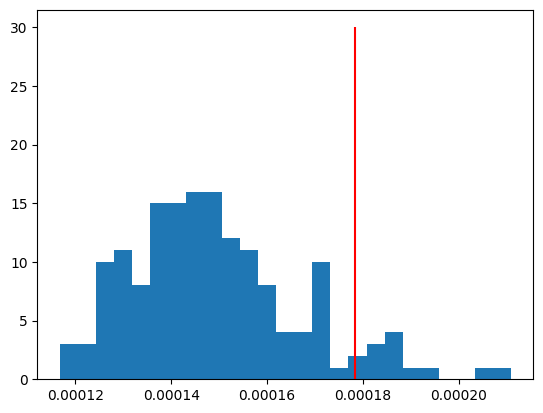

In [27]:
plt.hist(y_score,bins=25)
plt.vlines(x=best_threshold,ymin=0,ymax=30,color='r')
plt.show()

AUC-ROC Score: 0.4347202295552367


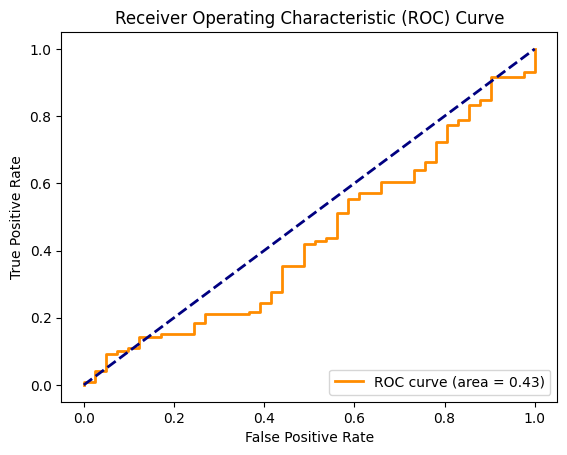

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score
import seaborn as sns



# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_true, y_score)
print("AUC-ROC Score:", auc_roc_score)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
from sklearn.metrics import precision_score, recall_score

# Calculate Precision and Recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8461538461538461
Recall: 0.09243697478991597


               precision    recall  f1-score   support

     Good (0)       0.27      0.95      0.41        41
Defective (1)       0.85      0.09      0.17       119

     accuracy                           0.31       160
    macro avg       0.56      0.52      0.29       160
 weighted avg       0.70      0.31      0.23       160

Precision = 0.8462, Recall = 0.0924, F1‑score = 0.1667


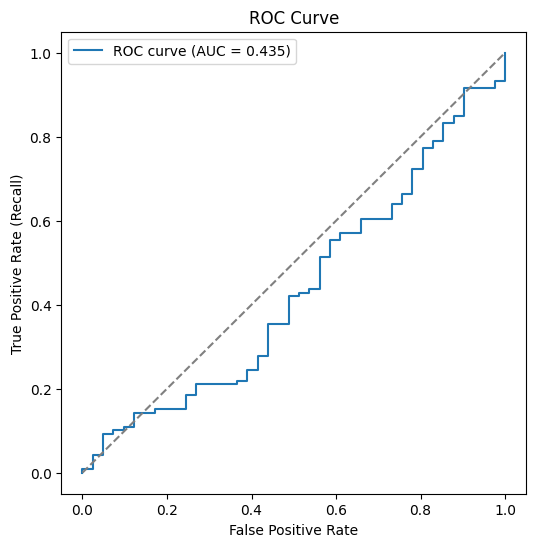

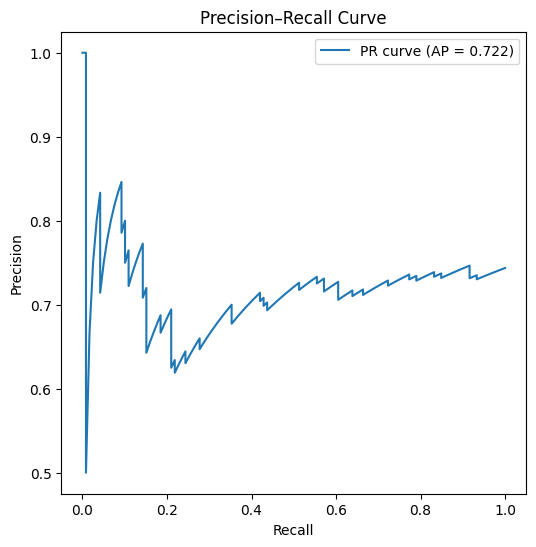

In [30]:
# Install sklearn if not already installed
!pip install scikit-learn --quiet

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    PrecisionRecallDisplay
)

# Suppose these are your arrays gathered during testing:
# y_true: ground truth labels (0 = normal/good, 1 = anomaly/defect)
# y_score: continuous anomaly scores (higher = more likely anomaly)
# y_pred: binary predictions based on a threshold

# Example:
# y_true = np.array([...])
# y_score = np.array([...])
# y_pred = np.array([...])

# 1. Classification report (precision, recall, F1 for each class)
print(classification_report(y_true, y_pred, target_names=['Good (0)', 'Defective (1)']))

# 2. Compute overall metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Precision = {precision:.4f}, Recall = {recall:.4f}, F1‑score = {f1:.4f}")

# 3. ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 4. Precision–Recall curve and Average Precision
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_score)
pr_auc = average_precision_score(y_true, y_score)

plt.figure(figsize=(6, 6))
plt.plot(recall_vals, precision_vals, label=f'PR curve (AP = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend()
plt.show()
